In [21]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)#导入seaborn包设定颜色

In [6]:
ad_features = pd.read_csv("./datasets/adFeature.csv")
X = pd.read_csv("./datasets/train_data.csv")
X.drop(X.columns[[0]], axis=1, inplace=True)  #删除某列函数

In [219]:
y = pd.read_csv("./datasets/train_target.csv", names=['label'], header=None)
y = y.reset_index(drop=True)

首先分析学历，可以看出学历等级，数据集未具体说明，猜测0代表博士，以此类推
可以看出点击率和学历并无绝对联系

In [26]:
X['education'].value_counts()

7    313046
2    221333
6    151589
1    106509
3     40307
5     29419
4      9630
0      8049
Name: education, dtype: int64

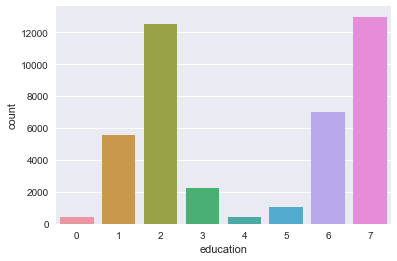

In [220]:
X_combined = pd.concat([X, y], axis=1) #将标签和特征组合
sns.countplot(x='education', data=X[X_combined['label']==1])

下一步分析消费能力和转化率的关系，消费能力为1的人群数量最多，点击率和消费水平有直接关系

In [17]:
X['consumptionAbility'].value_counts()

1    520369
0    188754
2    170759
Name: consumptionAbility, dtype: int64

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


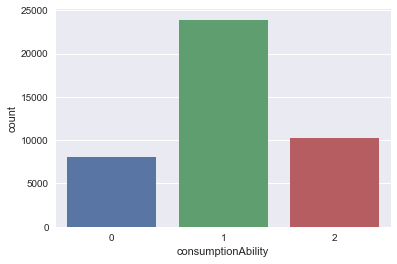

In [133]:
sns.countplot(x='consumptionAbility', data=X[X_combined['label']==1])

接着查看地理位置特征，可以看出缺失地理位置属性的用户只有10个，可以考虑训练时直接drop掉，然后将地理位置进行缩放，看起来两者是没有太大关系。。

In [215]:
import numpy as np
X_combined['LBS_scaled'] = X_combined['LBS'].apply(lambda x: np.floor(x/100))
X_combined['LBS_scaled'].value_counts()

 1.0    119344
 0.0    109073
 3.0    104937
 4.0     97703
 2.0     92031
 5.0     83637
 8.0     81771
 9.0     67597
 7.0     62723
 6.0     61056
-1.0        10
Name: LBS_scaled, dtype: int64

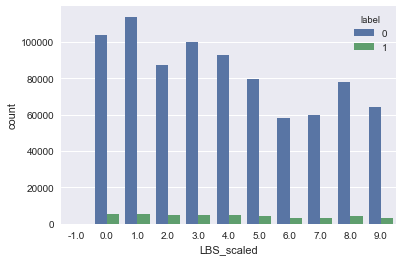

In [45]:
sns.countplot(x='LBS_scaled', data=X_combined, hue='label')

接下来分析用户兴趣特征, 首先查看5个兴趣组的分布情况， 可以看出兴趣组别3和4存在大部分缺失值，可以考虑drop这两个特征
另外兴趣组1缺失率为0.1，兴趣组2缺失率为0.3， 兴趣组5缺失率为0.25，所以可以考虑将缺失值用最长出现的值进行填充

In [137]:
X[['interest1', 'interest2',  'interest3',  'interest4',  'interest5']]

,interest1,interest2,interest3,interest4,interest5
0,70 77 30 109 76 75 69 28 8 106 29 67 59 49 64 ...,66 22 79 70 6 54 35,-1,-1,100 72 80 92 71 109 8 50 86 28 6 76 20 46 21 1...
1,77 75 29 46,73 52 1 46 70 21 74 10 29 35,-1,-1,80 92 131 78 8 30 115 6 42 46 59 36 64 129
2,36 11,-1,-1,-1,-1
3,69 49 122 6 60 23 36 54 11,-1,-1,-1,-1
4,93 70 86 37 109 75 4 8 29 49 6 2 73 72 46 36 1...,58 79 73 46 6 19 4 49 13 74 48 37,-1,-1,100 72 92 131 37 116 78 4 79 8 30 28 6 39 75 8...
5,-1,-1,-1,-1,-1
6,93 70 86 98 76 75 29 59 49 73 72 46 36 11 87,47 9 20,-1,-1,100 72 37 116 4 79 41 6 46 121 129
7,109 59 49 73 39 17 56 36 11 87,47 32 19 36,-1,-1,-1
8,93 109 12 69 59 49 119 89 42 91 46 111 35 36 3...,73 9 46 14,-1,-1,-1
9,93 70 77 86 37 109 75 29 49 6 42 72 46 35 56 3...,58 79 6 4 41 48,-1,-1,127 52 100 72 80 131 37 13 4 79 8 113 69 6 42 ...


In [152]:
X['interest2'].value_counts()[:20]

-1             296661
24 30           36132
70 54           12724
73              12724
73 74           10256
52 21            8084
9                7641
63 30            7339
79 6             5632
19 13            4733
21               4732
46 29            4613
31 44            4558
4 48             4263
70 10            3841
1 70             3519
24 73 30 74      3422
22 70            3206
4 41             3005
63 24 30         2904
Name: interest2, dtype: int64

In [153]:
len(X[X['interest2']== '-1'])/len(X) #兴趣组2的缺失率

0.33715998281587756

In [149]:
X['interest3'].value_counts()[:20]

-1                      856392
6 8 10 4 9 1 7 3 5 2      8365
6 8 4 10 9 1 7 3 5 2      1707
6 8 10 4 9 1 7 5 2        1242
4 5                        878
10 4 9 1 5 2               469
6 8 10 4 9 1 5 2           461
9                          443
6 10 4 9 1 5 2             372
4 9 5                      371
6 10 4 9 1 7 5 2           367
4 9 1 5 2                  334
10                         332
8 10 4 9 1 5 2             307
6 8 10 4 9 1 3 5 2         300
4 1 5 2                    291
6 8 4 10 9 1 7 5 2         280
8 10 4 9 1 7 5 2           277
10 9                       262
10 4 9 5                   254
Name: interest3, dtype: int64

In [150]:
X['interest4'].value_counts()[:20]

-1                866626
4 5                 1311
4 1 5 2              769
10 4 9 1 5 2         489
4 10 9 1 5 2         449
4 9 1 5 2            443
10                   416
10 4 9 5             408
1 2                  391
9                    385
4 9 5                347
6 10 4 9 1 5 2       331
6 4 5                297
6 4 10 9 1 5 2       292
10 9                 284
10 4 5               280
6 4 1 5 2            259
4 10 9 5             219
6 4 9 1 5 2          206
8 4 10 9 1 5 2       203
Name: interest4, dtype: int64

In [146]:
len(X[X['interest5']== '-1'])/len(X) #兴趣组5的缺失率为1/4

0.2519428741581258

In [155]:
all_interest = X['interest1'].value_counts()

In [95]:
interests = dict()
for i in np.array(all_interest):
    data = i.split(' ')
    for j in data:
        interests[j] = interests.get(j, 0) + 1

In [108]:
sort = sorted(interests.items(),key = lambda x:x[1],reverse = True)

In [123]:
sort

[('36', 518531),
 ('11', 518531),
 ('70', 451911),
 ('49', 410947),
 ('76', 346411),
 ('46', 330570),
 ('6', 323755),
 ('29', 323372),
 ('75', 285786),
 ('93', 282039),
 ('59', 265499),
 ('28', 232021),
 ('109', 222777),
 ('116', 197183),
 ('17', 194980),
 ('56', 194980),
 ('86', 169984),
 ('106', 164067),
 ('8', 160397),
 ('47', 159096),
 ('9', 149359),
 ('69', 148116),
 ('77', 140593),
 ('118', 136967),
 ('42', 132522),
 ('73', 131578),
 ('57', 124264),
 ('119', 121114),
 ('114', 119856),
 ('12', 114197),
 ('37', 105111),
 ('100', 94428),
 ('71', 93894),
 ('48', 93877),
 ('83', 93539),
 ('41', 92971),
 ('18', 92336),
 ('23', 90822),
 ('4', 88562),
 ('39', 85445),
 ('98', 83745),
 ('35', 67861),
 ('15', 67461),
 ('87', 66945),
 ('67', 63086),
 ('60', 53448),
 ('72', 52899),
 ('111', 52700),
 ('27', 50893),
 ('122', 50249),
 ('22', 50240),
 ('54', 48855),
 ('34', 46255),
 ('2', 45820),
 ('3', 44694),
 ('20', 41745),
 ('33', 40773),
 ('26', 39335),
 ('88', 39002),
 ('96', 38632),
 ('44'

接着继续查看兴趣组2-5

In [116]:
all_interest2 = X['interest2'].value_counts().index
all_interest2 = all_interest2.tolist()
interests2 = dict()
for i in np.array(all_interest2):
    data = i.split(' ')
    for j in data:
        interests2[j] = interests2.get(j, 0) + 1
sort2 = sorted(interests2.items(),key = lambda x:x[1],reverse = True)

In [125]:
all_interest3 = X['interest3'].value_counts().index
all_interest3 = all_interest3.tolist()
interests3 = dict()
for i in np.array(all_interest3):
    data = i.split(' ')
    for j in data:
        interests3[j] = interests3.get(j, 0) + 1
sort3 = sorted(interests3.items(),key = lambda x:x[1],reverse = True)

In [126]:
sort3

[('10', 163),
 ('4', 162),
 ('5', 162),
 ('9', 149),
 ('1', 142),
 ('2', 142),
 ('6', 129),
 ('8', 120),
 ('7', 119),
 ('3', 111),
 ('-1', 1)]

In [129]:
X['interest3'].value_counts()

-1                      856392
6 8 10 4 9 1 7 3 5 2      8365
6 8 4 10 9 1 7 3 5 2      1707
6 8 10 4 9 1 7 5 2        1242
4 5                        878
10 4 9 1 5 2               469
6 8 10 4 9 1 5 2           461
9                          443
6 10 4 9 1 5 2             372
4 9 5                      371
6 10 4 9 1 7 5 2           367
4 9 1 5 2                  334
10                         332
8 10 4 9 1 5 2             307
6 8 10 4 9 1 3 5 2         300
4 1 5 2                    291
6 8 4 10 9 1 7 5 2         280
8 10 4 9 1 7 5 2           277
10 9                       262
10 4 9 5                   254
1 2                        252
6 10 4 9 1 7 3 5 2         230
10 4 9 1 7 5 2             221
6                          196
6 4 9 1 5 2                181
9 1 2                      166
8 9                        164
10 4 5                     155
8 10 4 9 5                 127
10 9 1 2                   126
                         ...  
10 7 3                       1
6 4 9 7 

接下来分析兴趣关键字kw, 可以看出kw3的关键字缺失率很大，可以考虑去除

In [158]:
X[['kw1', 'kw2',  'kw3']].head()

,kw1,kw2,kw3
0,779963 342753 545452 194319 627369,32361 56505 79676 117357 33961,-1
1,223415 275159 411962 680328 391535,84508 66348 117586 38622 61483,-1
2,27326 580549 189366 100680,32981 95979 45119 108417 48892,-1
3,315951 755173 555994 274523 225925,117462 55952 76242 103994 42733,-1
4,361407 471398 118076 338851 619562,93916 8546 36764 766 18185,-1


In [161]:
X['kw3'].value_counts()[:20]

-1                               839313
36983 45477 22819 30214 43606        66
36983 30214 8820 36499 7540          58
48686                                51
36983 30214 8820 12870 36499         51
1838 35048 13594 44985 42505         49
31582 7264 45470 30852 5440          47
36983 30214 29847 55758 9888         40
16457 36983 45477 22819 30214        33
10173 52847 34185 29847 11928        32
8786 22059 549 20431 19216           32
36983 30214 8820 36499 25590         31
36983 55758 9888 39804 51356         30
627 52056 19944 32893 52102          28
36983 30214 55758 9888 39804         28
36983 22819 30214 43606 24190        28
470 16457 36983 45477 22819          26
36983 29847 55758 9888 39804         26
1790 24999 18462 58761 2069          24
36983 55758 9888 51356 39804         24
Name: kw3, dtype: int64

In [164]:
X['kw1'].value_counts()[:20]

-1               88507
8561              1068
271833             312
605930             279
279516             251
26682              240
338851             227
562294             214
691885 696607      164
126526             142
162804             141
68211              127
53354              113
555710             109
8561 605930         97
391535 338851       94
529821              93
530883              92
568750              91
373554              85
Name: kw1, dtype: int64

In [186]:
X['kw2'].value_counts()[:20]

-1                                  30145
9088 56438 47308 40921 30993         1944
16156 89228 79280 94601 34525        1121
101564 4837 38532 34154 100125       1056
56400 84023 26546 37224 32415         998
101564 4837 38532 110188 34154        917
32981 95979 45119 108417 48892        568
21675 76242 46275 56545 30947         485
9088 47308 82155 40921 99414          482
4125 74116 88919 104564 37224         472
18185 48892 115407 110619 112247      469
2095 97754 17710 84734 27033          439
51429 81357 8467 49132 5698           426
56438 47308 40921 31370 30993         413
77778 11538 40722 27626 109981        395
89228 79280 16156 94601 34525         359
11395 79112 52864 461 12933           345
89228 79280 16156 94601 83192         332
9088 99414 56438 47308 30993          328
52864 106259 461 108345 12933         287
Name: kw2, dtype: int64

看看kw2关键字是否和点击率有关联,可以看出两者没有明显关系，反而转化比例相比原始数据有降低

In [234]:
X_kw2 = X['kw2'].value_counts()[:100].index

In [235]:
X_kw2 = X_kw2.delete(0)

In [236]:
X_kw2 = X_combined[X_combined['kw2'].isin(X_kw2)]
X_kw2

,aid,uid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType,LBS,...,kw1,kw2,kw3,marriageStatus,os,topic1,topic2,topic3,LBS_scaled,label
2,1566,27200155,6946,296367,520004,59,24,3794,11,585.0,...,27326 580549 189366 100680,32981 95979 45119 108417 48892,-1,10,0,9375 2070 8133 2264 5625,-1,-1,5.0,0
22,966,62157783,915,31020,666210,22,51,0,4,364.0,...,516553 148878 542548 667322 493471,78618 76377 77930 31004 29946,-1,11,0,4684 1234 8088 2398 6390,1704 3929 6442 6238 3773,-1,3.0,0
188,1468,2817066,915,994,1610899,60,51,0,4,346.0,...,394744 201461 164253 122409 289116,89228 79280 16156 94601 34525,43606 24190 29847 14125 6827,10,1,2217 8428 2344 5236 4889,3633 9848 4338 9992 5782,7366 6563 8131 3940 6598,3.0,0
189,1605,72580088,11195,19215,1755470,53,140,0,4,246.0,...,669978 500100 46819 250988 503994,16156 89228 79280 94601 34525,-1,10,1,5744 9022 9205 3313 3860,6442 6440 5582 473 4346,-1,2.0,0
199,70,51985884,327,5616,5977,22,27,113,9,585.0,...,547250 655744 8718,4125 74116 88919 104564 37224,-1,15,2,4143 7009 5451 4807 4625,4977 1447 6761 8900 2948,-1,5.0,0
240,1998,43061524,15174,26003,1260597,35,125,0,6,950.0,...,374227 410287 589299 548239 740358,96987 42727 75218 20036 39284,-1,11,1,9826 6812 3941 8196 523,4870 1704 8510 744 9403,-1,9.0,0
314,411,54256714,9106,163120,220179,79,21,0,4,176.0,...,446340,8546,-1,10,2,7993 6306 9826 523 8138,6459 5115 5641,-1,1.0,0
345,411,81295759,9106,163120,220179,79,21,0,4,105.0,...,497092 89975 638383 755693 299096,18185 48892 115407 110619 112247,470 20768 16457 36983 14981,11,0,2611 7075 306 1846 9826,41 248 2997 4362 2955,5015 8519 3418 3319 6924,1.0,1
380,1291,79575200,1082,40405,1434096,53,13,0,6,346.0,...,567739 284342 140919 589223 183434,9202 15760 81476 63970 95678,-1,11,1,5009 2719 2688 3441 4867,4931 2700 9223 1891 7647,-1,3.0,0
410,561,68525640,44008,100565,808799,79,21,0,4,431.0,...,6217 668297 538596 320528 206925,77181 79250 50708 39727 117548,-1,11,2,9826 644 7684 254 523,4840 1031 9910 3920 8608,-1,4.0,0


In [237]:
click_number = X_kw2['label'].sum()
click_number

1189

In [238]:
kw2_num = X['kw2'].value_counts()[1:100].sum()  #算出kw2关键字排在前100的总人数，转化比例b为1189/22430=0.05
kw2_num

22430

In [229]:
total_clicknum = X_combined['label'].sum() #原始数据集的总点击人数，转化比例为42196/879882 = 0.08
total_clicknum

42196

接着测试兴趣组1和转化比例的关系，和总体趋势保持一致

In [249]:
X_inter1 = X['interest1'].value_counts()[:100].index
X_inter1 = X_inter1.delete(0)
X_inter1 = X_combined[X_combined['interest1'].isin(X_inter1)]
click_number = X_inter1['label'].sum()
click_number/X['interest1'].value_counts()[1:100].sum()

0.054957496566316495

接下来分析主题,同样可以看出主题3的缺失率极高可以考虑去除,而且其余主题相关性也不是很大

In [257]:
X['topic3'].value_counts()[:10]

-1                          839195
2864 551 292 6545 8117         132
8131 4226 8867 8695 7352        52
9434 767 8316 9291 2189         34
6213 9434 4345 124 3101         34
6563 6598 5460 7366 7551        25
3145 9434 410 7467 4632         24
7712 750 6234 8684 7889         18
7818 5458 4971 8587 9336        17
3610 3096 4100 9346 689         16
Name: topic3, dtype: int64

In [267]:
X_topic1 = X['topic1'].value_counts()[:100].index
X_topic1 = X_topic1.delete(0)
X_topic1 = X_combined[X_combined['topic1'].isin(X_topic1)]
click_number = X_topic1['label'].sum()
click_number/X['topic1'].value_counts()[1:100].sum()

0.0679650238473768

接下来分析用户近期安装的app，发现大部分是缺失值而且与用户转化无关可考虑去除

In [289]:
X_combined[(X['appIdInstall']!='-1')][['label']].sum()

label    1011
dtype: int64

In [ ]:
接下来分析用户近期活跃使用的app，发现大部分是缺失值而且与用户转化无关可考虑去除

In [291]:
X_combined[(X['appIdAction']!='-1')][['label']].sum()

label    757
dtype: int64

下面分析房子特征，可以看出缺失值很高,转化比例也低于总样本

In [300]:
click_number = X_combined[(X['house']!=-1)][['label']].sum()
click_number/len(X_combined[(X['house']!=-1)])

label    0.044861
dtype: float64

In [301]:
X['house'].value_counts()

-1.0    721147
 1.0    158735
Name: house, dtype: int64

至此所有特征已分析完，分辨出了几个缺失率极高的特征值，但仍未找到与转化率最相关的特征，还需要进一步挖掘